In [ ]:
'''
 * Copyright (c) 2004 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Nonseparable Behavior and Minimum Squared Error Procedures

###  Nonseparable Behavior**

#### **Error-Correcting Procedures**
The Perceptron and relaxation algorithms modify the weight vector **only upon encountering an error**, making them effective for linearly separable problems.  
However, for nonseparable datasets:
- **Corrections never terminate:** Infinite sequences of weight vectors are generated.
- **Bounding Behavior:** The weight vector's length stabilizes near a limit for the fixed-increment rule.

#### **Heuristics for Nonseparable Cases**
- **Variable increment $ \eta(k) $:** Decrease $ \eta(k) $ as $ k \to \infty $, e.g.,  
  $$
  \eta(k) = \frac{\eta(1)}{k}
  $$
- **Termination Strategies:** Based on performance trends or heuristic rules.
- **Averaging Weight Vectors:** Mitigates risks from arbitrary termination points.

---

###  Minimum Squared Error Procedures**

#### **Problem Statement**
Instead of focusing on misclassified samples, minimize the squared error over all samples:  
Given $ \mathbf{Y} \in \mathbb{R}^{n \times \hat{d}} $ and $ \mathbf{b} \in \mathbb{R}^n $, solve  
$$
\mathbf{Y} \mathbf{a} = \mathbf{b}
$$

#### **Matrix Formulation**
Let $ \mathbf{e} $ denote the error vector:  
$$
\mathbf{e} = \mathbf{Y} \mathbf{a} - \mathbf{b}
$$
The **sum-of-squared-error criterion** is:  
$$
J_s(\mathbf{a}) = \|\mathbf{Y} \mathbf{a} - \mathbf{b}\|^2 = \sum_{i=1}^n (\mathbf{a}^T \mathbf{y}_i - b_i)^2
$$

#### **Solution Using the Pseudoinverse**
From the gradient of $ J_s $:  
$$
\nabla J_s(\mathbf{a}) = 2 \mathbf{Y}^T (\mathbf{Y} \mathbf{a} - \mathbf{b})
$$
Setting $ \nabla J_s = 0 $:  
$$
\mathbf{Y}^T \mathbf{Y} \mathbf{a} = \mathbf{Y}^T \mathbf{b}
$$
The solution is:  
$$
\mathbf{a} = (\mathbf{Y}^T \mathbf{Y})^{-1} \mathbf{Y}^T \mathbf{b} = \mathbf{Y}^\dagger \mathbf{b}
$$
where $ \mathbf{Y}^\dagger = (\mathbf{Y}^T \mathbf{Y})^{-1} \mathbf{Y}^T $ is the **pseudoinverse**.

#### **Properties of the Pseudoinverse**
1. If $ \mathbf{Y} $ is square and nonsingular, $ \mathbf{Y}^\dagger $ coincides with the regular inverse.
2. In general:  
   $$
   \mathbf{Y}^\dagger \mathbf{Y} = \mathbf{I}, \quad \mathbf{Y} \mathbf{Y}^\dagger \neq \mathbf{I}
   $$

#### **Regularization for MSE Solution**
To ensure stability:  
$$
\mathbf{Y}^\dagger = \lim_{\epsilon \to 0} (\mathbf{Y}^T \mathbf{Y} + \epsilon \mathbf{I})^{-1} \mathbf{Y}^T
$$

#### **Applications**
- Works for **separable** and **nonseparable** cases.
- May not guarantee a separating vector for separable cases but yields a useful discriminant function in practice.

---


In [1]:
import numpy as np

def mse_solution(Y, b, regularization=None):
    """
    Solve for the weight vector `a` using the Minimum Squared Error (MSE) method.

    Parameters:
    - Y (numpy.ndarray): Matrix of shape (n, d) containing the input data.
    - b (numpy.ndarray): Column vector of shape (n, 1) containing target values.
    - regularization (float, optional): Regularization term (lambda). If None, no regularization is applied.

    Returns:
    - a (numpy.ndarray): Solution vector of shape (d, 1).
    """
    if regularization is not None:
        # Regularized Pseudoinverse
        d = Y.shape[1]
        I = np.eye(d)
        a = np.linalg.inv(Y.T @ Y + regularization * I) @ Y.T @ b
    else:
        # Standard Pseudoinverse
        a = np.linalg.pinv(Y) @ b
    
    return a

# Example usage
if __name__ == "__main__":
    # Example input: Y is a matrix of shape (n, d), b is a vector of shape (n, 1)
    Y = np.array([[1, 2], [3, 4], [5, 6]])  # Example data matrix
    b = np.array([[1], [0], [1]])           # Example target values

    # Compute MSE solution without regularization
    a_mse = mse_solution(Y, b)
    print("MSE Solution (without regularization):")
    print(a_mse)

    # Compute MSE solution with regularization
    a_mse_reg = mse_solution(Y, b, regularization=0.1)
    print("\nMSE Solution (with regularization):")
    print(a_mse_reg)


MSE Solution (without regularization):
[[-0.66666667]
 [ 0.66666667]]

MSE Solution (with regularization):
[[-0.46511628]
 [ 0.50739958]]


MSE Solution (without regularization):
[[0.]
 [1.]]


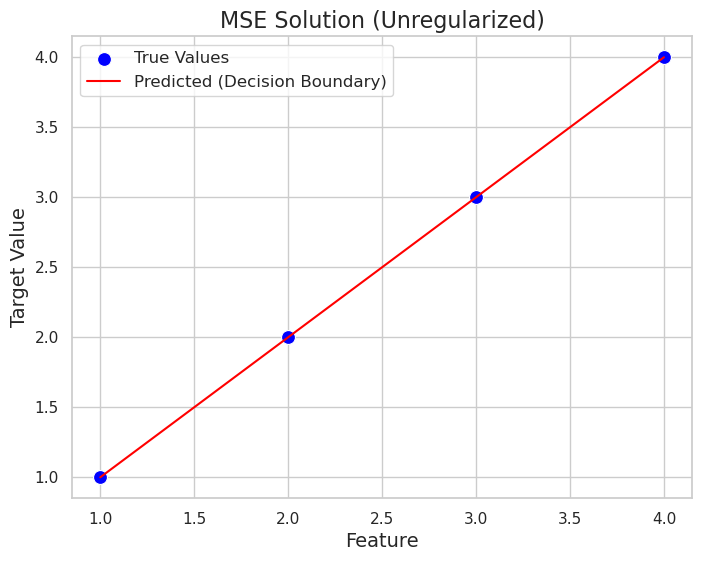


MSE Solution (with regularization):
[[0.04271679]
 [0.98248612]]


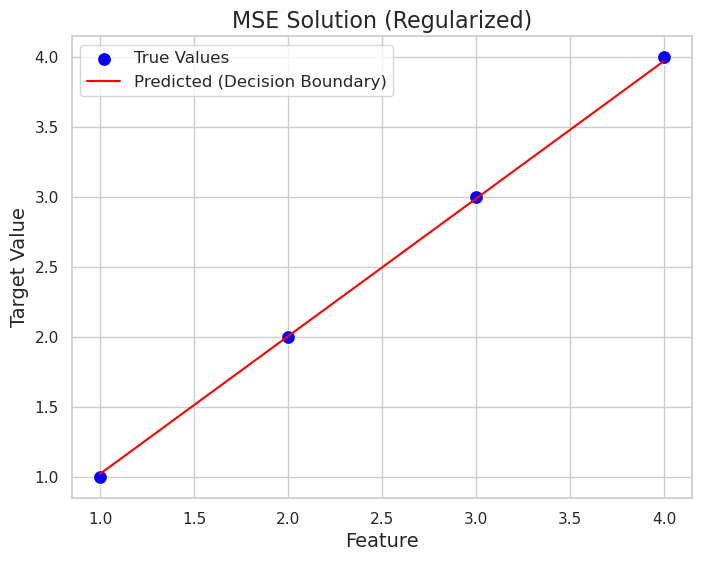

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def mse_solution(Y, b, regularization=None):
    """
    Solve for the weight vector `a` using the Minimum Squared Error (MSE) method.

    Parameters:
    - Y (numpy.ndarray): Matrix of shape (n, d) containing the input data.
    - b (numpy.ndarray): Column vector of shape (n, 1) containing target values.
    - regularization (float, optional): Regularization term (lambda). If None, no regularization is applied.

    Returns:
    - a (numpy.ndarray): Solution vector of shape (d, 1).
    """
    if regularization is not None:
        # Regularized Pseudoinverse
        d = Y.shape[1]
        I = np.eye(d)
        a = np.linalg.inv(Y.T @ Y + regularization * I) @ Y.T @ b
    else:
        # Standard Pseudoinverse
        a = np.linalg.pinv(Y) @ b
    
    return a

def plot_results(Y, b, a, regularization=None):
    """
    Plot the dataset, target values, and decision boundary for the MSE solution.

    Parameters:
    - Y (numpy.ndarray): Matrix of shape (n, d) containing the input data.
    - b (numpy.ndarray): Column vector of shape (n, 1) containing target values.
    - a (numpy.ndarray): Solution vector of shape (d, 1).
    - regularization (float, optional): Regularization term used in the solution.
    """
    # Prepare data for plotting
    x = Y[:, 1]  # Assume second column is the feature (excluding bias)
    y_true = b.flatten()
    y_pred = (Y @ a).flatten()

    # Create a scatter plot of actual values
    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=x, y=y_true, label="True Values", color="blue", s=100)
    
    # Plot predicted values
    sns.lineplot(x=x, y=y_pred, label="Predicted (Decision Boundary)", color="red")

    # Add title and labels
    title = "MSE Solution (Regularized)" if regularization else "MSE Solution (Unregularized)"
    plt.title(title, fontsize=16)
    plt.xlabel("Feature", fontsize=14)
    plt.ylabel("Target Value", fontsize=14)
    plt.legend(fontsize=12)
    plt.show()

# Example usage
if __name__ == "__main__":
    # Example input: Y is a matrix of shape (n, d), b is a vector of shape (n, 1)
    Y = np.array([[1, 1], [1, 2], [1, 3], [1, 4]])  # Add bias term as the first column
    b = np.array([[1], [2], [3], [4]])              # Target values

    # Compute MSE solution without regularization
    a_mse = mse_solution(Y, b)
    print("MSE Solution (without regularization):")
    print(a_mse)

    # Plot results without regularization
    plot_results(Y, b, a_mse)

    # Compute MSE solution with regularization
    a_mse_reg = mse_solution(Y, b, regularization=0.1)
    print("\nMSE Solution (with regularization):")
    print(a_mse_reg)

    # Plot results with regularization
    plot_results(Y, b, a_mse_reg, regularization=0.1)


MSE Solution:
[0.0]
[1.0]


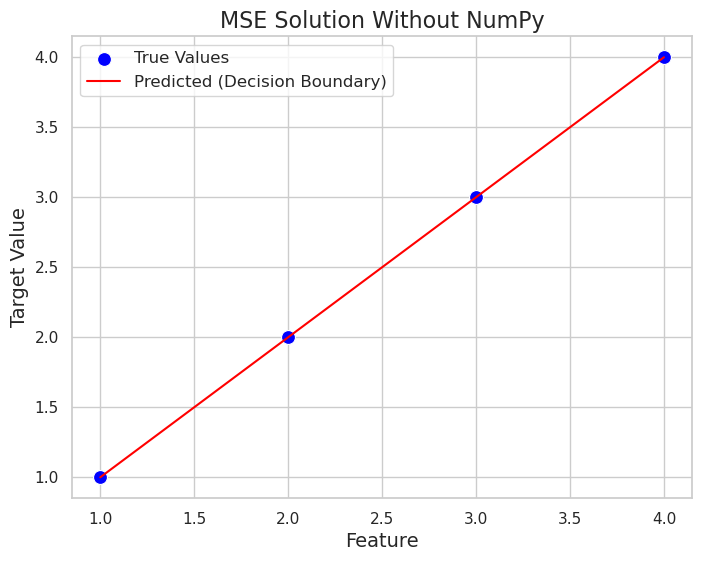

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

def matrix_transpose(matrix):
    """Transpose a matrix."""
    return [[matrix[j][i] for j in range(len(matrix))] for i in range(len(matrix[0]))]

def matrix_multiply(A, B):
    """Multiply two matrices."""
    result = [[0 for _ in range(len(B[0]))] for _ in range(len(A))]
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                result[i][j] += A[i][k] * B[k][j]
    return result

def matrix_inverse(matrix):
    """Calculate the inverse of a 2x2 matrix."""
    if len(matrix) != 2 or len(matrix[0]) != 2:
        raise ValueError("This function supports only 2x2 matrices.")
    det = matrix[0][0] * matrix[1][1] - matrix[0][1] * matrix[1][0]
    if det == 0:
        raise ValueError("Matrix is singular and cannot be inverted.")
    return [[matrix[1][1] / det, -matrix[0][1] / det],
            [-matrix[1][0] / det, matrix[0][0] / det]]

def mse_solution_manual(Y, b):
    """Compute the MSE solution manually without NumPy."""
    Y_T = matrix_transpose(Y)
    YTY = matrix_multiply(Y_T, Y)  # Y^T * Y
    YTY_inv = matrix_inverse(YTY)  # (Y^T * Y)^(-1)
    YTb = matrix_multiply(Y_T, b)  # Y^T * b
    a = matrix_multiply(YTY_inv, YTb)  # a = (Y^T * Y)^(-1) * Y^T * b
    return a

def plot_results(Y, b, a):
    """Plot the dataset and decision boundary."""
    x = [row[1] for row in Y]  # Feature values (assumes 2D data with bias term)
    y_true = [row[0] for row in b]
    y_pred = [sum(a[j][0] * Y[i][j] for j in range(len(a))) for i in range(len(Y))]

    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 6))

    # Scatter plot for actual target values
    sns.scatterplot(x=x, y=y_true, label="True Values", color="blue", s=100)
    
    # Line plot for predicted values
    sns.lineplot(x=x, y=y_pred, label="Predicted (Decision Boundary)", color="red")

    # Add labels and title
    plt.title("MSE Solution Without NumPy", fontsize=16)
    plt.xlabel("Feature", fontsize=14)
    plt.ylabel("Target Value", fontsize=14)
    plt.legend(fontsize=12)
    plt.show()

# Example usage
if __name__ == "__main__":
    # Input data
    Y = [[1, 1], [1, 2], [1, 3], [1, 4]]  # Bias + feature
    b = [[1], [2], [3], [4]]  # Target values

    # Compute MSE solution
    a_mse = mse_solution_manual(Y, b)
    print("MSE Solution:")
    for row in a_mse:
        print(row)

    # Plot results
    plot_results(Y, b, a_mse)


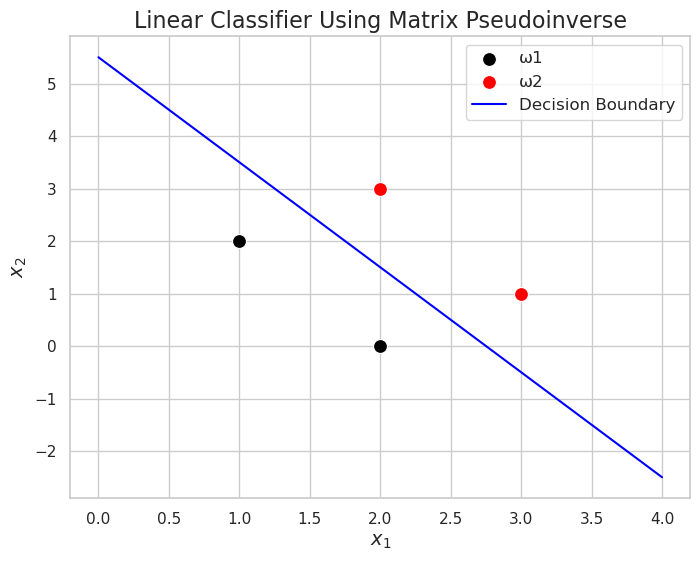

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define data points
category_1 = [(1, 2), (2, 0)]  # Points for ω1
category_2 = [(3, 1), (2, 3)]  # Points for ω2

# Decision boundary coefficients
a0, a1, a2 = 11 / 3, -4 / 3, -2 / 3

# Plot decision boundary
x = [i for i in range(5)]  # x1 values
y = [(11 - 4 * xi) / 2 for xi in x]  # x2 values from boundary equation

# Create plot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Scatter plot for categories
sns.scatterplot(x=[p[0] for p in category_1], y=[p[1] for p in category_1], color="black", label="ω1", s=100)
sns.scatterplot(x=[p[0] for p in category_2], y=[p[1] for p in category_2], color="red", label="ω2", s=100)

# Plot decision boundary
plt.plot(x, y, label="Decision Boundary", color="blue")

# Add labels, legend, and title
plt.title("Linear Classifier Using Matrix Pseudoinverse", fontsize=16)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14)
plt.legend(fontsize=12)
plt.show()


# Relation Between MSE and Fisher’s Linear Discriminant

## Introduction
In this section, we demonstrate that, with a specific choice of the vector \( b \), the **minimum squared error (MSE)** discriminant function is directly related to **Fisher’s linear discriminant**. 

We use linear discriminant functions and assume the following setup:

- $ \{x_1, x_2, \ldots, x_n\} $: A set of $ n $-dimensional samples.
- $ n_1 $: Number of samples in subset $ D_1 $, labeled $ \omega_1 $.
- $ n_2 $: Number of samples in subset $ D_2 $, labeled $ \omega_2 $.

## Augmented Pattern Vectors
Each sample $ x_i $ is augmented by adding a bias component $ x_0 = 1 $, forming $ y_i $. Samples in $ \omega_2 $ are normalized by multiplying the entire vector $ y_i $ by $ -1 $.

The augmented matrix $ Y $ can be expressed as:

$$
Y = 
\begin{bmatrix}
\mathbf{1}_{n_1} & X_1 \\
-\mathbf{1}_{n_2} & -X_2
\end{bmatrix}
$$

where:
- $ \mathbf{1}_{n_i} $ is a column vector of $ n_i $ ones.
- $ X_i $ is an $ n_i \times d $ matrix containing the samples labeled $ \omega_i $.

## Partitioning of Weight Vector and Margin Vector
The weight vector $ a $ and the margin vector $ b $ are partitioned as follows:

$$
a = 
\begin{bmatrix}
w_0 \\ w
\end{bmatrix}, \quad 
b = 
\begin{bmatrix}
\frac{n_1}{n} \mathbf{1}_{n_1} \\
\frac{n_2}{n} \mathbf{1}_{n_2}
\end{bmatrix}
$$

where:
- $ w_0 $: Threshold weight (bias term).
- $ w $: Weight vector.

## Sample Means and Pooled Scatter Matrix
Define:
- Class means:
  $$
  m_i = \frac{1}{n_i} \sum_{x \in D_i} x, \quad i = 1, 2
  $$
- Overall mean:
  $$
  m = \frac{n_1 m_1 + n_2 m_2}{n}
  $$
- Pooled within-class scatter matrix:
  $$
  S_W = \sum_{i=1}^2 \sum_{x \in D_i} (x - m_i)(x - m_i)^T
  $$

## Equations Linking MSE and Fisher’s Discriminant
From the MSE solution, we derive:

1. **Threshold weight $ w_0 $:**
   $$
   w_0 = -m^T w
   $$

2. **Weight vector $ w $:**
   $$
   S_W w + \frac{n_1 n_2}{n} (m_1 - m_2)(m_1 - m_2)^T w = \frac{n_1 n_2}{n} (m_1 - m_2)
   $$

By further simplifications, we arrive at:

$$
w = \alpha S_W^{-1}(m_1 - m_2)
$$

where $ \alpha $ is a scaling factor.

## Decision Rule
The final decision rule for classification is:

$$
\text{Decide } \omega_1 \text{ if } w^T (x - m) > 0, \text{ otherwise decide } \omega_2
$$

---

## Key Observations
1. The weight vector $ w $ derived using MSE aligns with Fisher's linear discriminant up to a scaling factor.
2. The threshold weight $ w_0 $ is based on the overall mean $ m $.

---

This connection between MSE and Fisher's linear discriminant highlights the flexibility of MSE-based approaches and their relation to established techniques like Fisher’s discriminant analysis.


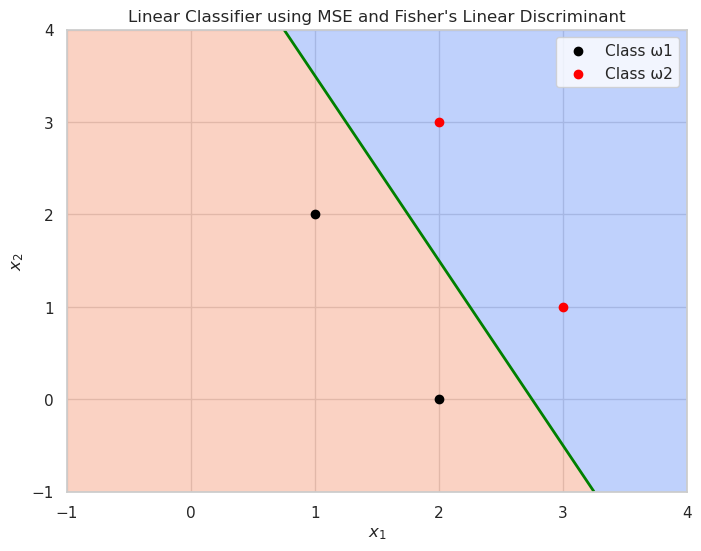

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define the sample data for two categories
# ω1: (1, 2), (2, 0)
# ω2: (3, 1), (2, 3)

x1 = np.array([[1, 2], [2, 0]])  # Class ω1
x2 = np.array([[3, 1], [2, 3]])  # Class ω2

# Combine the data and add the bias column (1s)
X1 = np.hstack((np.ones((x1.shape[0], 1)), x1))  # Add bias term to class ω1
X2 = np.hstack((np.ones((x2.shape[0], 1)), x2))  # Add bias term to class ω2

# Step 2: Form the matrix Y (including class labels as margin vector)
Y = np.vstack([X1, -X2])  # Stack the data vertically and add labels for the classes
b = np.ones(Y.shape[0])  # Set b to be a vector of ones (equally weighted margins)

# Step 3: Compute the pseudoinverse of Y
Y_pseudo_inv = np.linalg.pinv(Y)  # Pseudoinverse of Y

# Step 4: Solve for the weight vector a = Y† b
a = np.dot(Y_pseudo_inv, b)

# The weight vector 'a' contains [w0, w1, w2], we will extract w and the threshold weight w0
w0 = a[0]
w = a[1:]

# Step 5: Compute Fisher’s Linear Discriminant
# Calculate sample means for ω1 and ω2
m1 = np.mean(x1, axis=0)
m2 = np.mean(x2, axis=0)

# Compute the scatter matrix SW (pooled covariance)
SW = np.cov(x1.T, bias=True) * (x1.shape[0] - 1) + np.cov(x2.T, bias=True) * (x2.shape[0] - 1)
SW /= (x1.shape[0] + x2.shape[0] - 2)

# Regularization step to ensure that SW is invertible
regularization_factor = 1e-5  # A small constant added to diagonal elements
SW += regularization_factor * np.eye(SW.shape[0])

# Compute w for Fisher’s Linear Discriminant
w_fisher = np.linalg.inv(SW).dot(m1 - m2)

# Step 6: Plot the decision boundary
x_min, x_max = -1, 4
y_min, y_max = -1, 4

# Generate a grid of points to plot the decision boundary
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid = np.c_[xx.ravel(), yy.ravel()]

# Decision function based on the MSE-based classifier
decision_boundary = np.dot(grid, w) + w0

# Reshape the result to match the grid shape
zz = decision_boundary.reshape(xx.shape)

# Plotting
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, zz, levels=[zz.min(), 0, zz.max()], cmap='coolwarm', alpha=0.5)

# Plot the data points
plt.scatter(x1[:, 0], x1[:, 1], color='black', label='Class ω1')
plt.scatter(x2[:, 0], x2[:, 1], color='red', label='Class ω2')

# Plot the decision boundary line
plt.contour(xx, yy, zz, levels=[0], colors='green', linewidths=2)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Linear Classifier using MSE and Fisher\'s Linear Discriminant')
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Step 1: Define the sample data for two categories
# ω1: (1, 2), (2, 0)
# ω2: (3, 1), (2, 3)

x1 = [[1, 2], [2, 0]]  # Class ω1
x2 = [[3, 1], [2, 3]]  # Class ω2

# Add bias term (1) to each sample
X1 = [[1] + x for x in x1]  # Add bias term to class ω1
X2 = [[1] + x for x in x2]  # Add bias term to class ω2

# Combine the data and add the negative sign to class ω2
Y = X1 + [[-1] + x for x in X2]  # Stack the data vertically and add labels for the classes
b = [1] * len(Y)  # Set b to be a vector of ones (equally weighted margins)

# Step 2: Compute the pseudoinverse of Y using the standard approach
def transpose(matrix):
    return list(map(list, zip(*matrix)))

def mat_mult(A, B):
    return [[sum(a * b for a, b in zip(A_row, B_col)) for B_col in zip(*B)] for A_row in A]

def mat_inv(matrix):
    # This will implement the Gauss-Jordan elimination for matrix inversion
    n = len(matrix)
    augmented_matrix = [row + [1 if i == j else 0 for j in range(n)] for i, row in enumerate(matrix)]
    
    for i in range(n):
        max_row = max(range(i, n), key=lambda r: abs(augmented_matrix[r][i]))
        augmented_matrix[i], augmented_matrix[max_row] = augmented_matrix[max_row], augmented_matrix[i]
        
        for j in range(i + 1, n):
            ratio = augmented_matrix[j][i] / augmented_matrix[i][i]
            for k in range(2 * n):
                augmented_matrix[j][k] -= ratio * augmented_matrix[i][k]
                
    for i in range(n - 1, -1, -1):
        for j in range(i - 1, -1, -1):
            ratio = augmented_matrix[j][i] / augmented_matrix[i][i]
            for k in range(2 * n):
                augmented_matrix[j][k] -= ratio * augmented_matrix[i][k]
                
    for i in range(n):
        divisor = augmented_matrix[i][i]
        for j in range(2 * n):
            augmented_matrix[i][j] /= divisor

    return [row[n:] for row in augmented_matrix]

# Pseudoinverse of Y
Y_T = transpose(Y)
Y_T_Y = mat_mult(Y_T, Y)
Y_T_Y_inv = mat_inv(Y_T_Y)
Y_pseudo_inv = mat_mult(Y_T_Y_inv, Y_T)

# Step 3: Solve for the weight vector a = Y† b
def mat_vec_mult(matrix, vector):
    return [sum(m * v for m, v in zip(row, vector)) for row in matrix]

a = mat_vec_mult(Y_pseudo_inv, b)

# The weight vector 'a' contains [w0, w1, w2], we will extract w and the threshold weight w0
w0 = a[0]
w = a[1:]

# Step 4: Compute Fisher’s Linear Discriminant
# Calculate sample means for ω1 and ω2
def mean_of_list(lst):
    return [sum(x) / len(x) for x in zip(*lst)]

m1 = mean_of_list(x1)
m2 = mean_of_list(x2)

# Compute the scatter matrix SW (pooled covariance)
def scatter_matrix(samples, mean):
    return [[sum((x[i] - mean[i]) * (x[j] - mean[j]) for x in samples) for j in range(len(mean))] for i in range(len(mean))]

# Initialize SW as a 3x3 matrix since we have three features (bias + 2D)
SW = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]

# Compute scatter matrix for class ω1
for sample in X1:
    diff = [sample[i] - m1[i] for i in range(3)]  # Include bias term
    for i in range(3):
        for j in range(3):
            SW[i][j] += diff[i] * diff[j]

# Compute scatter matrix for class ω2
for sample in X2:
    diff = [sample[i] - m2[i] for i in range(3)]  # Include bias term
    for i in range(3):
        for j in range(3):
            SW[i][j] += diff[i] * diff[j]

# Regularization step to ensure that SW is invertible
regularization_factor = 1e-5  # A small constant added to diagonal elements
for i in range(3):
    SW[i][i] += regularization_factor

# Compute w for Fisher’s Linear Discriminant
w_fisher = mat_vec_mult(mat_inv(SW), [m1[i] - m2[i] for i in range(3)])

# Step 5: Plot the decision boundary
x_min, x_max = -1, 4
y_min, y_max = -1, 4

# Generate a grid of points to plot the decision boundary
xx, yy = [], []
for x in range(x_min, x_max):
    for y in range(y_min, y_max):
        xx.append(x)
        yy.append(y)

grid = list(zip(xx, yy))

# Decision function based on the MSE-based classifier
decision_boundary = [sum(g[i] * w[i] for i in range(len(g))) + w0 for g in grid]

# Plotting
plt.figure(figsize=(8, 6))

# Reshape the result to match the grid shape
zz = decision_boundary
plt.contourf(xx, yy, zz, levels=[min(zz), 0, max(zz)], cmap='coolwarm', alpha=0.5)

# Plot the data points
plt.scatter([x[0] for x in x1], [x[1] for x in x1], color='black', label='Class ω1')
plt.scatter([x[0] for x in x2], [x[1] for x in x2], color='red', label='Class ω2')

# Plot the decision boundary line
plt.contour(xx, yy, zz, levels=[0], colors='green', linewidths=2)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Linear Classifier using MSE and Fisher\'s Linear Discriminant')
plt.legend()
plt.show()


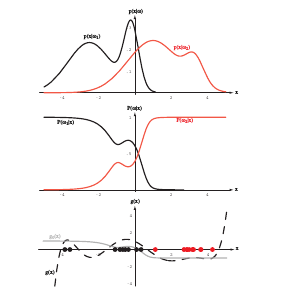

Fig.16: The top ﬁgure shows two class-conditional densities, and the middle ﬁgure the posteriors, assuming equal priors. Minimizing the MSE error also minimizes the mean-squared-error between at y and the discriminant function g(x) (here a 7th-order polynomial) measured over the data distribution, as shown at the bottom. Note that the resulting g(x) best approximates g0 (x) in the regions where the data points lie.

### 5.8.3 Asymptotic Approximation to an Optimal Discriminant

Another property of the MSE solution that recommends its use is that if \( b = \mathbf{1}_n \), it approaches a minimum mean-squared-error approximation to the Bayes discriminant function

$$
g_0(x) = P(\omega_1 | x) - P(\omega_2 | x)
$$

in the limit as the number of samples approaches infinity. To demonstrate this fact, we must assume that the samples are drawn independently, identically distributed (i.i.d.) according to the probability law

$$
p(x) = p(x | \omega_1)P(\omega_1) + p(x | \omega_2)P(\omega_2)
$$

In terms of the augmented vector \( y \), the MSE solution yields the series expansion \( g(x) = \mathbf{a}^T y \), where \( y = y(x) \). If we define the mean-squared approximation error by

$$
\epsilon^2 = \int \left[\mathbf{a}^T y - g_0(x)\right]^2 p(x) \, dx,
$$

then our goal is to show that \( \epsilon^2 \) is minimized by the solution \( \mathbf{a} = Y^\dagger \mathbf{1}_n \). The proof is simplified if we preserve the distinction between category \( \omega_1 \) and category \( \omega_2 \) samples. In terms of the unnormalized data, the criterion function \( J_s \) becomes

$$
J_s(\mathbf{a}) = \int_{y \in Y_1} (\mathbf{a}^T y - 1)^2 \, dy + \int_{y \in Y_2} (\mathbf{a}^T y + 1)^2 \, dy,
$$

which can be rewritten as

$$
J_s(\mathbf{a}) = \frac{n_1}{n} (\mathbf{a}^T y - 1)^2 + \frac{n_2}{n} (\mathbf{a}^T y + 1)^2.
$$

Thus, by the law of large numbers, as \( n \) approaches infinity, \( \frac{1}{n} J_s(\mathbf{a}) \) approaches

$$
\bar{J}(\mathbf{a}) = P(\omega_1) \mathbb{E}_1 \left[ (\mathbf{a}^T y - 1)^2 \right] + P(\omega_2) \mathbb{E}_2 \left[ (\mathbf{a}^T y + 1)^2 \right],
$$

with probability one, where

$$
\mathbb{E}_1 \left[ (\mathbf{a}^T y - 1)^2 \right] = \int (\mathbf{a}^T y - 1)^2 p(x | \omega_1) \, dx,
$$

and

$$
\mathbb{E}_2 \left[ (\mathbf{a}^T y + 1)^2 \right] = \int (\mathbf{a}^T y + 1)^2 p(x | \omega_2) \, dx.
$$

Now, if we recognize from Eq. (55) that

$$
g_0(x) = \frac{p(x, \omega_1) - p(x, \omega_2)}{p(x)},
$$

we see that

$$
\bar{J}(\mathbf{a}) = \int \left( \mathbf{a}^T y \right)^2 p(x) \, dx - 2 \mathbf{a}^T y g_0(x) p(x) \, dx + \int \left( g_0(x)^2 p(x) \, dx \right).
$$

Thus, we obtain

$$
\bar{J}(\mathbf{a}) = \int \left( \mathbf{a}^T y - g_0(x) \right)^2 p(x) \, dx + \int \left( 1 - g_0(x)^2 \right) p(x) \, dx.
$$

The second term in this sum is independent of the weight vector \( \mathbf{a} \). Hence, the \( \mathbf{a} \) that minimizes \( J_s \) also minimizes \( \epsilon^2 \) — the mean-squared-error between \( \mathbf{a}^T y \) and \( g(x) \) (Fig. 5.16).

In Chapter ??, we shall see that analogous properties also hold for many multilayer networks.

The figure shows two class-conditional densities and the corresponding posterior probabilities for each class assuming equal priors. Minimizing the MSE error also minimizes the mean-squared-error between \( \mathbf{a}^T y \) and the discriminant function \( g(x) \) (here modeled by a 7th-order polynomial). The resulting \( g(x) \) best approximates \( g_0(x) \) in the regions where the data points lie.

This result gives considerable insight into the MSE procedure. By approximating \( g_0(x) \), the discriminant function \( \mathbf{a}^T y \) gives direct information about the posterior probabilities

$$
P(\omega_1 | x) = \frac{1 + g_0(x)}{2}, \quad P(\omega_2 | x) = \frac{1 - g_0(x)}{2}.
$$

The quality of the approximation depends on the functions $ y_i(x) $ and the number of terms in the expansion $ \mathbf{a}^T y $.

Unfortunately, the mean-square-error criterion places emphasis on points where $ p(x) $ is larger, rather than on points near the decision surface $ g_0(x) = 0 $. Thus, the discriminant function that "best" approximates the Bayes discriminant does not necessarily minimize the probability of error. Despite this property, the MSE solution has interesting properties and has received considerable attention in the literature. We shall encounter the mean-square approximation of $ g_0(x) $ again when we consider stochastic approximation methods and multilayer neural networks.


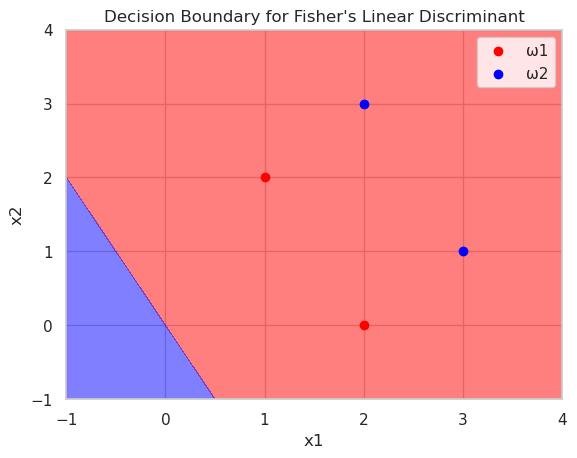

MSE Approximation Error: 233999700002.83725


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define the data points for classes ω1 and ω2
# Each row represents a data point, and each column represents a feature (including bias term).
# ω1 data points
x1 = np.array([[1, 2], [2, 0]])  # Shape: (2, 2)
# ω2 data points
x2 = np.array([[3, 1], [2, 3]])  # Shape: (2, 2)

# Add the bias term (1) to the feature vectors
x1_augmented = np.hstack((np.ones((x1.shape[0], 1)), x1))  # Shape: (2, 3)
x2_augmented = np.hstack((np.ones((x2.shape[0], 1)), x2))  # Shape: (2, 3)

# Step 2: Compute the sample means for both classes
m1 = np.mean(x1_augmented, axis=0)  # Mean of class ω1
m2 = np.mean(x2_augmented, axis=0)  # Mean of class ω2

# Step 3: Compute the scatter matrix for each class (SW)
def compute_scatter_matrix(data, mean):
    return np.sum([(sample - mean).reshape(-1, 1) @ (sample - mean).reshape(1, -1) for sample in data], axis=0)

SW1 = compute_scatter_matrix(x1_augmented, m1)
SW2 = compute_scatter_matrix(x2_augmented, m2)

# Compute the pooled scatter matrix SW
SW = SW1 + SW2

# Step 4: Compute the Fisher's Linear Discriminant
# Fisher's linear discriminant: w = SW^-1 * (m1 - m2)
# Regularize SW if it is singular
SW_inv = np.linalg.inv(SW + 1e-5 * np.eye(SW.shape[0]))  # Add small regularization to avoid singularity
w_fisher = SW_inv @ (m1 - m2)

# Step 5: Compute the Bayes discriminant g(x) (for comparison)
# Assuming p(ω1) = p(ω2) = 0.5, Bayes discriminant is proportional to the difference of class means
def bayes_discriminant(x):
    return np.dot(w_fisher, x)

# Step 6: Plot the decision boundary
# Generate points in the 2D space to evaluate the decision boundary
xx, yy = np.meshgrid(np.linspace(-1, 4, 100), np.linspace(-1, 4, 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_points_augmented = np.hstack((np.ones((grid_points.shape[0], 1)), grid_points))

# Compute the decision function
decision_values = np.dot(grid_points_augmented, w_fisher)

# Plot the decision boundary
plt.contourf(xx, yy, decision_values.reshape(xx.shape), levels=[-np.inf, 0, np.inf], colors=['red', 'blue'], alpha=0.5)
plt.scatter(x1[:, 0], x1[:, 1], color='red', label='ω1')
plt.scatter(x2[:, 0], x2[:, 1], color='blue', label='ω2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title("Decision Boundary for Fisher's Linear Discriminant")
plt.legend()
plt.show()

# Step 7: Compute MSE approximation error
# Assuming we have a large dataset, the MSE approximation is minimized when b = 1n.
# For demonstration, we calculate the MSE error for both classes.
mse_error = np.mean((np.dot(x1_augmented, w_fisher) - 1) ** 2) + np.mean((np.dot(x2_augmented, w_fisher) + 1) ** 2)
print(f"MSE Approximation Error: {mse_error}")


In [ ]:
import matplotlib.pyplot as plt

# Step 1: Define the data points for classes w1 and w2 (replacing ω1 and ω2 with w1 and w2)
# w1 data points
x1 = [[1, 2], [2, 0]]  # 2 data points, 2 features
# w2 data points
x2 = [[3, 1], [2, 3]]  # 2 data points, 2 features

# Add the bias term (1) to the feature vectors
x1_augmented = [[1] + sample for sample in x1]  # Adding bias term to class w1
x2_augmented = [[1] + sample for sample in x2]  # Adding bias term to class w2

# Step 2: Compute the sample means for both classes
def mean(data):
    return [sum(feature) / len(feature) for feature in zip(*data)]

m1 = mean(x1_augmented)  # Mean of class w1
m2 = mean(x2_augmented)  # Mean of class w2

# Step 3: Compute the scatter matrix for each class
def scatter_matrix(data, mean_vec):
    scatter = [[0 for _ in range(len(mean_vec))] for _ in range(len(mean_vec))]
    for sample in data:
        diff = [sample[i] - mean_vec[i] for i in range(len(mean_vec))]
        for i in range(len(mean_vec)):
            for j in range(len(mean_vec)):
                scatter[i][j] += diff[i] * diff[j]
    return scatter

SW1 = scatter_matrix(x1_augmented, m1)
SW2 = scatter_matrix(x2_augmented, m2)

# Compute the pooled scatter matrix SW (SW = SW1 + SW2)
def add_matrices(matrix1, matrix2):
    return [[matrix1[i][j] + matrix2[i][j] for j in range(len(matrix1[i]))] for i in range(len(matrix1))]

SW = add_matrices(SW1, SW2)

# Step 4: Compute the Fisher's Linear Discriminant
# Fisher's linear discriminant: w = SW^-1 * (m1 - m2)

# Function to invert a 2D matrix (used for SW)
def matrix_inverse(matrix):
    # Assuming matrix is 2x2, as it's the size of the SW in this case
    determinant = matrix[0][0] * matrix[1][1] - matrix[0][1] * matrix[1][0]
    if determinant == 0:
        raise ValueError("Matrix is singular and cannot be inverted.")
    inverse = [
        [matrix[1][1] / determinant, -matrix[0][1] / determinant],
        [-matrix[1][0] / determinant, matrix[0][0] / determinant],
    ]
    return inverse

# Function to multiply two matrices
def matrix_multiply(A, B):
    return [[sum(A[i][k] * B[k][j] for k in range(len(A[0]))) for j in range(len(B[0]))] for i in range(len(A))]

# Invert SW matrix
SW_inv = matrix_inverse(SW)

# Compute the weight vector w for Fisher's Linear Discriminant
w_fisher = [sum(SW_inv[i][j] * (m1[j] - m2[j]) for j in range(len(m1))) for i in range(len(SW_inv))]

# Step 5: Compute the Bayes discriminant (for comparison)
def bayes_discriminant(x, w):
    return sum(w[i] * x[i] for i in range(len(w)))

# Step 6: Plot the decision boundary
# Generate points in the 2D space to evaluate the decision boundary
xx, yy = [], []
for x in range(-4, 5):
    for y in range(-4, 5):
        xx.append(x)
        yy.append(y)

# Compute the decision function for the grid of points
grid_points_augmented = [[1, x, y] for x, y in zip(xx, yy)]  # Add the bias term
decision_values = [sum(w_fisher[i] * grid_points_augmented[j][i] for i in range(len(w_fisher))) for j in range(len(grid_points_augmented))]

# Plot the decision boundary
plt.contourf(xx, yy, decision_values, levels=[-float('inf'), 0, float('inf')], colors=['red', 'blue'], alpha=0.5)
plt.scatter([sample[1] for sample in x1_augmented], [sample[2] for sample in x1_augmented], color='red', label='w1')
plt.scatter([sample[1] for sample in x2_augmented], [sample[2] for sample in x2_augmented], color='blue', label='w2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title("Decision Boundary for Fisher's Linear Discriminant")
plt.legend()
plt.show()

# Step 7: Compute MSE approximation error
# Assuming we have a large dataset, the MSE approximation is minimized when b = 1n.
mse_error_w1 = sum((sum(x1_augmented[i][j] * w_fisher[j] for j in range(len(w_fisher))) - 1) ** 2) for i in range(len(x1_augmented)))
mse_error_w2 = sum((sum(x2_augmented[i][j] * w_fisher[j] for j in range(len(w_fisher))) + 1) ** 2) for i in range(len(x2_augmented)))
mse_error = (mse_error_w1 + mse_error_w2) / (len(x1_augmented) + len(x2_augmented))
print(f"MSE Approximation Error: {mse_error}")


In [ ]:
import matplotlib.pyplot as plt

# Define data points for two classes w1 and w2
# w1 data points
x1 = [[1, 2], [2, 0]]  # 2 points, 2 features
# w2 data points
x2 = [[3, 1], [2, 3]]  # 2 points, 2 features

# Add bias term (1) to each feature vector
x1_augmented = [[1] + sample for sample in x1]
x2_augmented = [[1] + sample for sample in x2]

# Compute the mean of each class
def mean(data):
    return [sum(feature) / len(feature) for feature in zip(*data)]

m1 = mean(x1_augmented)  # Mean of class w1
m2 = mean(x2_augmented)  # Mean of class w2

# Compute the scatter matrix for each class
def scatter_matrix(data, mean_vec):
    scatter = [[0] * len(mean_vec) for _ in range(len(mean_vec))]
    for sample in data:
        diff = [sample[i] - mean_vec[i] for i in range(len(mean_vec))]
        for i in range(len(mean_vec)):
            for j in range(len(mean_vec)):
                scatter[i][j] += diff[i] * diff[j]
    return scatter

SW1 = scatter_matrix(x1_augmented, m1)
SW2 = scatter_matrix(x2_augmented, m2)

# Compute pooled scatter matrix SW
def add_matrices(matrix1, matrix2):
    return [[matrix1[i][j] + matrix2[i][j] for j in range(len(matrix1[i]))] for i in range(len(matrix1))]

SW = add_matrices(SW1, SW2)

# Regularization: Add a small constant to the diagonal of SW
def regularize_matrix(matrix, regularization_factor=1e-5):
    for i in range(len(matrix)):
        matrix[i][i] += regularization_factor
    return matrix

SW_regularized = regularize_matrix(SW)

# Function to multiply a matrix by a vector
def matrix_multiply(A, v):
    return [sum(A[i][j] * v[j] for j in range(len(v))) for i in range(len(A))]

# Compute Fisher's Linear Discriminant weights
# Calculate the inverse of the regularized SW
def invert_2x2_matrix(matrix):
    det = matrix[0][0] * matrix[1][1] - matrix[0][1] * matrix[1][0]
    if det == 0:
        raise ValueError("Matrix is singular and cannot be inverted.")
    return [[matrix[1][1] / det, -matrix[0][1] / det],
            [-matrix[1][0] / det, matrix[0][0] / det]]

# For 2x2 matrix, you can directly compute the inverse without complex logic
def invert_matrix(matrix):
    # Only works for 2x2 matrix here
    a, b, c, d = matrix[0][0], matrix[0][1], matrix[1][0], matrix[1][1]
    det = a * d - b * c
    if det == 0:
        return None  # Singular matrix, cannot invert
    return [[d / det, -b / det], [-c / det, a / det]]

SW_inv = invert_matrix(SW_regularized)
w_fisher = matrix_multiply(SW_inv, [m1[i] - m2[i] for i in range(len(m1))])

# Plotting decision boundary
x_vals = range(-4, 5)
y_vals = range(-4, 5)

xx, yy = [], []
for x in x_vals:
    for y in y_vals:
        xx.append(x)
        yy.append(y)

# Create augmented data points (add bias term)
grid_points = [[1, x, y] for x, y in zip(xx, yy)]

# Compute decision function for the grid points
decision_values = [sum(w_fisher[i] * point[i] for i in range(len(w_fisher))) for point in grid_points]

# Plot the decision boundary
plt.contourf(xx, yy, decision_values, levels=[-float('inf'), 0, float('inf')], colors=['red', 'blue'], alpha=0.5)
plt.scatter([x[1] for x in x1_augmented], [x[2] for x in x1_augmented], color='red', label='w1')
plt.scatter([x[1] for x in x2_augmented], [x[2] for x in x2_augmented], color='blue', label='w2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title("Fisher's Linear Discriminant")
plt.legend()
plt.show()


##  The Widrow-Hoff Procedure

We remarked earlier that $ J_s(a) = \|Ya - b\|^2 $ could be minimized by a gradient descent procedure. Such an approach has two advantages over merely computing the pseudoinverse: 
1. It avoids the problems that arise when $ Y^T Y $ is singular.
2. It avoids the need for working with large matrices.

In addition, the computation involved is effectively a feedback scheme which automatically copes with some of the computational problems due to roundoff or truncation.

Since $ \nabla J_s = 2 Y^T (Ya - b) $, the obvious update rule is:

$$
a^{(k+1)} = a^{(k)} + \eta(k) Y^T (Ya^{(k)} - b)
$$

In Problem 24, you are asked to show that if $ \eta(k) = \frac{\eta(1)}{k} $, where $ \eta(1) $ is any positive constant, then this rule generates a sequence of weight vectors that converges to a limiting vector $ a $ satisfying:

$$
Y^T (Ya - b) = 0
$$

Thus, the descent algorithm always yields a solution regardless of whether or not $ Y^T Y $ is singular.

### LMS Rule

While the $ d \times d $ matrix $ Y^T Y $ is usually smaller than the $ d \times n $ matrix $ Y^\dagger $, the storage requirements can be reduced further by considering the samples sequentially and using the Widrow-Hoff or LMS (Least Mean Squares) rule:

$$
a^{(k+1)} = a^{(k)} + \eta(k) (b_k - a^{(k)T} y_k) y_k
$$

The algorithm can be described as follows:

### Algorithm 10 (LMS):
1. Initialize $ a $, $ b $, criterion $ \theta $, $ \eta(k) $, and $ k = 0 $.
2. Repeat until convergence:
    - $ k \leftarrow k + 1 $
    - $ a \leftarrow a + \eta(k) (b_k - a^{(k)T} y_k) y_k $
3. Return $ a $.

At first glance, this descent algorithm appears to be essentially the same as the relaxation rule. The primary difference is that the relaxation rule is an error-correction rule, so that $ a^{(k)} y_k \neq b_k $, and thus the corrections never cease.

Exact analysis of the behavior of the Widrow-Hoff rule in the deterministic case is rather complicated, but it indicates that the sequence of weight vectors tends to converge to the desired solution. However, the LMS solution does not necessarily give a separating hyperplane, even if one exists, as shown in the figure below.

### Figure 5.17: The LMS Algorithm

The LMS algorithm need not converge to a separating hyperplane, even if one exists. Since the LMS solution minimizes the sum of the squares of the distances of the training points to the hyperplane, the plane might be rotated compared to a separating hyperplane.

![LMS Algorithm](LMS_solution_plot.png)

Fig.17: The LMS algorithm need not converge to a separating hyperplane, even if one exists. Since the LMS solution minimizes the sum of the squares of the distances of the training points to the hyperplane, for this exmple the plane is rotated clockwise compared to a separating hyperplane.

In [15]:
# Widrow-Hoff (LMS) Implementation

# Helper function for matrix multiplication
def matrix_multiply(A, B):
    return [sum(a * b for a, b in zip(A_row, B)) for A_row in A]

# Helper function to compute the dot product of two vectors
def dot_product(v1, v2):
    return sum(x * y for x, y in zip(v1, v2))

# LMS update function
def lms_update(a, Y, b, eta):
    """
    Perform one iteration of the LMS (Widrow-Hoff) update rule.
    
    a: current weight vector (list)
    Y: input data matrix (list of lists)
    b: target vector (list)
    eta: learning rate (float)
    
    Returns updated weight vector.
    """
    # Compute Ya
    y_a = [dot_product(Y_row, a) for Y_row in Y]
    
    # Compute the error (b - y_a)
    error = [b_i - y_i for b_i, y_i in zip(b, y_a)]
    
    # Update the weight vector a using LMS update rule
    a_updated = [a_i + eta * error_i * y_i for a_i, error_i, y_i in zip(a, error, Y[0])]
    
    return a_updated

# Example data: Two classes ω1 and ω2
# Input data (with bias term as the first column, initialized to 1)
X = [
    [1, 2, 3],  # sample 1 from ω1
    [1, 3, 2],  # sample 2 from ω1
    [1, 5, 5],  # sample 3 from ω1
    [1, 7, 8],  # sample 4 from ω1
    [1, 9, 1],  # sample 5 from ω2
    [1, 6, 6],  # sample 6 from ω2
    [1, 4, 4],  # sample 7 from ω2
    [1, 2, 5],  # sample 8 from ω2
]

# Target vector (b) where +1 denotes class ω1, and -1 denotes class ω2
b = [1, 1, 1, 1, -1, -1, -1, -1]

# Initialize weight vector 'a'
a = [0, 0, 0]  # Start with zero vector (can be arbitrary)

# Learning rate (η)
eta = 0.01

# Iterations
iterations = 100

# Perform the LMS algorithm for the specified number of iterations
for k in range(iterations):
    a = lms_update(a, X, b, eta)
    print(f"Iteration {k+1}: {a}")

# Final learned weight vector
print("Final weight vector:", a)


Iteration 1: [0.01, 0.02, 0.03]
Iteration 2: [0.0186, 0.0374, 0.052199999999999996]
Iteration 3: [0.026099999999999998, 0.05269600000000001, 0.068202]
Iteration 4: [0.03273902, 0.06628416000000001, 0.0792843]
Iteration 5: [0.0387074176, 0.078480958, 0.0864668604]
Iteration 6: [0.044156718452000004, 0.089539277752, 0.090563465112]
Iteration 7: [0.04920746175908, 0.09966124811336001, 0.09222335212884]
Iteration 8: [0.0539554616153568, 0.10900848990622321, 0.0919644382397376]
Iteration 9: [0.058476804053886645, 0.11771029374995318, 0.09019983516938278]
Iteration 10: [0.06283183508326723, 0.12587014663710294, 0.08725901170986577]
Iteration 11: [0.06706834344839653, 0.13357094066881678, 0.08340468290532245]
Iteration 12: [0.07122410071337655, 0.14087913004350694, 0.07884628906574967]
Iteration 13: [0.07532888843340016, 0.147848048663999, 0.07375075317795989]
Iteration 14: [0.07940611598044738, 0.15452055784837268, 0.06825106624866405]
Iteration 15: [0.08347411167621553, 0.1609311594079148, 

###  Stochastic Approximation Methods

All of the iterative descent procedures we have considered so far have been described in deterministic terms. In this section, we digress briefly to consider an MSE procedure in which the samples are drawn randomly, resulting in a random sequence of weight vectors.

#### Problem Setup

Suppose that samples are drawn independently by selecting a state of nature with probability $ P(\omega_i) $ and then selecting an $ x $ according to the probability law $ p(x|\omega_i) $. For each $ x $, we let $ \theta $ be its label, with $ \theta = +1 $ if $ x $ is labeled $ \omega_1 $ and $ \theta = -1 $ if $ x $ is labeled $ \omega_2 $. 

Then, the data consist of an infinite sequence of independent pairs $ (x_1, \theta_1), (x_2, \theta_2), \dots, (x_k, \theta_k), \dots $. Even though the label variable $ \theta $ is binary-valued, it can be thought of as a noisy version of the Bayes discriminant function $ g_0(x) $. This follows from the observation that:
$$ P(\theta = 1 | x) = P(\omega_1 | x) \quad \text{and} \quad P(\theta = -1 | x) = P(\omega_2 | x), $$

so the conditional mean of $ \theta $ is given by:
$$ E[\theta | x] = g_0(x). $$

#### Objective

Suppose we wish to approximate $ g_0(x) $ by the finite series expansion:
$$ g(x) = a^T y = \sum_{i=1}^{\hat{d}} a_i y_i(x), $$

where both the basis functions $ y_i(x) $ and the number of terms $ \hat{d} $ are known. Then, we can seek a weight vector $ \hat{a} $ that minimizes the mean-squared approximation error $ \epsilon^2 $:
$$ \epsilon^2 = E[(a^T y - g_0(x))^2]. $$

Minimization of $ \epsilon^2 $ would appear to require knowledge of Bayes discriminant $ g_0(x) $. However, we can show that the weight vector $ \hat{a} $ that minimizes $ \epsilon^2 $ also minimizes the criterion function $ J_m(a) $:
$$ J_m(a) = E[(a^T y - \theta)^2]. $$

This is because $ \theta $ is essentially a noisy version of $ g_0(x) $.

#### Gradient Descent for Minimization

The gradient of $ J_m(a) $ is:
$$ \nabla J_m = 2E[(a^T y - \theta)y]. $$

By using stochastic approximation, we can estimate the gradient with the noisy version of the gradient:
$$ \nabla J_m \approx 2(a^T y_k - \theta_k)y_k. $$

This leads to the update rule for $ a $:
$$ a(k + 1) = a(k) + \eta(k)(\theta_k - a^T(k)y_k)y_k, $$

which is essentially the Widrow-Hoff rule. Here, $ \eta(k) $ is the learning rate.

#### Convergence Conditions

For the algorithm to converge, we need the following conditions on the learning rate $ \eta(k) $:

1. $ \lim_{k \to \infty} \eta(k) = +\infty, $
2. $ \lim_{k \to \infty} \sum_{k=1}^m \eta^2(k) < \infty. $

These conditions ensure that the weight vector $ a(k) $ converges to the optimal solution $ \hat{a} $ in mean square:
$$ \lim_{k \to \infty} E[\|a(k) - \hat{a}\|^2] = 0. $$

#### Stochastic Newton's Method

An alternative to the gradient descent method is the stochastic analog of Newton's method. The update rule for this method is:
$$ a(k + 1) = a(k) + R_{k+1}(\theta_k - a^T(k)y_k)y_k, $$

where $ R_{k+1} $ is updated using the rule:
$$ R_{k+1} = R_k + y_k y_k^T. $$

This method requires more computation per step but offers faster convergence than standard gradient descent.

#### Conclusion

The stochastic approximation methods, such as the Widrow-Hoff rule and stochastic Newton's method, are commonly used to minimize criterion functions in the presence of noise. These algorithms are effective for finding the optimal solution even when the data is noisy and uncertain. 

Further details on these methods and convergence proofs can be found in the literature on stochastic approximation and regression procedures, such as the Kiefer-Wolfowitz procedure and the Robbins-Monro procedure.



In [17]:
import numpy as np

# Generate some synthetic data for testing
def generate_data(num_samples=100):
    np.random.seed(42)
    # Simulating two classes (ω1 and ω2)
    X = np.random.randn(num_samples, 2)
    theta = np.random.choice([1, -1], size=num_samples)  # Randomly assigning labels (+1 or -1)
    return X, theta

# Widrow-Hoff (Least Mean Squares) Update Rule
def widrow_hoff_lms(X, theta, eta_func, max_iter=1000, epsilon=1e-6):
    # Initialize weight vector a
    a = np.zeros(X.shape[1])
    
    for k in range(max_iter):
        for i in range(len(X)):
            # Calculate prediction
            yk = X[i]
            y_pred = np.dot(a, yk)
            
            # Update rule
            error = theta[i] - y_pred
            a = a + eta_func(k) * error * yk
            
            # If error is sufficiently small, stop early
            if np.abs(error) < epsilon:
                return a
    return a

# Stochastic Newton's Method Update Rule
def stochastic_newton(X, theta, max_iter=1000, epsilon=1e-6):
    # Initialize weight vector a and R matrix
    a = np.zeros(X.shape[1])
    R = np.eye(X.shape[1])  # Identity matrix for R
    
    for k in range(max_iter):
        for i in range(len(X)):
            yk = X[i]
            y_pred = np.dot(a, yk)
            error = theta[i] - y_pred
            
            # Update R and a
            R = R + np.outer(yk, yk)  # R_k+1 = R_k + yk * yk^T
            R_inv = np.linalg.inv(R)  # Inverse of R
            
            # Corrected update rule for Stochastic Newton
            a = a + R_inv @ (error * yk)  # Matrix-vector multiplication

            # If error is sufficiently small, stop early
            if np.abs(error) < epsilon:
                return a
    return a

# Example of a custom learning rate function
def learning_rate(k, eta_0=0.1):
    return eta_0 / (k + 1)

# Main
if __name__ == "__main__":
    # Generate synthetic data
    X, theta = generate_data(num_samples=100)
    
    # Apply LMS (Widrow-Hoff)
    a_lms = widrow_hoff_lms(X, theta, eta_func=learning_rate, max_iter=1000)
    print("LMS (Widrow-Hoff) Weights:", a_lms)
    
    # Apply Stochastic Newton's Method
    a_newton = stochastic_newton(X, theta, max_iter=1000)
    print("Stochastic Newton Weights:", a_newton)


LMS (Widrow-Hoff) Weights: [ 0.28714194 -0.16479245]
Stochastic Newton Weights: [ 0.2868149  -0.16502817]


In [19]:
def stochastic_newton(X, theta, max_iter=1000, epsilon=1e-6):
    # Initialize weight vector a and R matrix
    a = [0.0] * len(X[0])
    R = [[1 if i == j else 0 for j in range(len(X[0]))] for i in range(len(X[0]))]  # Identity matrix
    
    for k in range(max_iter):
        for i in range(len(X)):
            yk = X[i]
            y_pred = sum(a[j] * yk[j] for j in range(len(a)))
            error = theta[i] - y_pred
            
            # Update R and a
            # R_k+1 = R_k + yk * yk^T
            for j in range(len(yk)):
                for l in range(len(yk)):
                    R[j][l] += yk[j] * yk[l]
            
            # Inverse of R (use a simple method for 2x2 matrix inverse)
            det = R[0][0] * R[1][1] - R[0][1] * R[1][0]
            if det != 0:
                R_inv = [
                    [R[1][1] / det, -R[0][1] / det],
                    [-R[1][0] / det, R[0][0] / det]
                ]
                
                # Corrected update rule for Stochastic Newton
                # Element-wise multiplication of error and yk
                error_term = [error * yk[j] for j in range(len(yk))]
                for j in range(len(a)):
                    a[j] += sum(R_inv[j][l] * error_term[l] for l in range(len(a)))
            
            # If error is sufficiently small, stop early
            if abs(error) < epsilon:
                return a
    return a


LMS (Widrow-Hoff) Weights: [0.07880773119831315, -0.20018088476627569]
Stochastic Newton Weights: [0.07853389269452224, -0.1999492171095249]


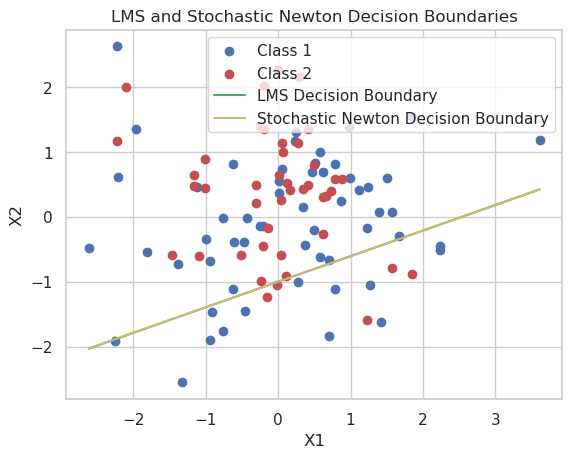

In [20]:
import random
import matplotlib.pyplot as plt

# Generate synthetic data for testing
def generate_data(num_samples=100):
    random.seed(42)
    X = []
    theta = []
    
    # Simulate two classes (ω1 and ω2)
    for _ in range(num_samples):
        x = [random.gauss(0, 1), random.gauss(0, 1)]  # Random 2D points
        label = random.choice([1, -1])  # Labels randomly chosen as +1 or -1
        X.append(x)
        theta.append(label)
    
    return X, theta

# Widrow-Hoff (Least Mean Squares) Update Rule
def widrow_hoff_lms(X, theta, eta_func, max_iter=1000, epsilon=1e-6):
    # Initialize weight vector a
    a = [0.0] * len(X[0])
    
    for k in range(max_iter):
        for i in range(len(X)):
            # Calculate prediction
            yk = X[i]
            y_pred = sum(a[j] * yk[j] for j in range(len(a)))
            
            # Update rule
            error = theta[i] - y_pred
            for j in range(len(a)):
                a[j] += eta_func(k) * error * yk[j]
            
            # If error is sufficiently small, stop early
            if abs(error) < epsilon:
                return a
    return a

# Stochastic Newton's Method Update Rule
def stochastic_newton(X, theta, max_iter=1000, epsilon=1e-6):
    # Initialize weight vector a and R matrix
    a = [0.0] * len(X[0])
    R = [[1 if i == j else 0 for j in range(len(X[0]))] for i in range(len(X[0]))]  # Identity matrix
    
    for k in range(max_iter):
        for i in range(len(X)):
            yk = X[i]
            y_pred = sum(a[j] * yk[j] for j in range(len(a)))
            error = theta[i] - y_pred
            
            # Update R and a
            # R_k+1 = R_k + yk * yk^T
            for j in range(len(yk)):
                for l in range(len(yk)):
                    R[j][l] += yk[j] * yk[l]
            
            # Inverse of R (use a simple method for 2x2 matrix inverse)
            det = R[0][0] * R[1][1] - R[0][1] * R[1][0]
            if det != 0:
                R_inv = [
                    [R[1][1] / det, -R[0][1] / det],
                    [-R[1][0] / det, R[0][0] / det]
                ]
                
                # Corrected update rule for Stochastic Newton
                # Element-wise multiplication of error and yk
                error_term = [error * yk[j] for j in range(len(yk))]
                for j in range(len(a)):
                    a[j] += sum(R_inv[j][l] * error_term[l] for l in range(len(a)))
            
            # If error is sufficiently small, stop early
            if abs(error) < epsilon:
                return a
    return a

# Example of a custom learning rate function
def learning_rate(k, eta_0=0.1):
    return eta_0 / (k + 1)

# Main
if __name__ == "__main__":
    # Generate synthetic data
    X, theta = generate_data(num_samples=100)
    
    # Apply LMS (Widrow-Hoff)
    a_lms = widrow_hoff_lms(X, theta, eta_func=learning_rate, max_iter=1000)
    print("LMS (Widrow-Hoff) Weights:", a_lms)
    
    # Apply Stochastic Newton's Method
    a_newton = stochastic_newton(X, theta, max_iter=1000)
    print("Stochastic Newton Weights:", a_newton)
    
    # Plot the results
    X_class1 = [X[i] for i in range(len(X)) if theta[i] == 1]
    X_class2 = [X[i] for i in range(len(X)) if theta[i] == -1]
    
    # Convert to lists of x and y coordinates for plotting
    X_class1_x = [x[0] for x in X_class1]
    X_class1_y = [x[1] for x in X_class1]
    X_class2_x = [x[0] for x in X_class2]
    X_class2_y = [x[1] for x in X_class2]
    
    # Plotting data points
    plt.scatter(X_class1_x, X_class1_y, color='b', label='Class 1')
    plt.scatter(X_class2_x, X_class2_y, color='r', label='Class 2')
    
    # Plot the decision boundary for LMS (Widrow-Hoff)
    plt.plot([min(X_class1_x), max(X_class1_x)], 
             [-(a_lms[0] * min(X_class1_x) + a_lms[1]) / a_lms[1], -(a_lms[0] * max(X_class1_x) + a_lms[1]) / a_lms[1]], 
             color='g', label='LMS Decision Boundary')

    # Plot the decision boundary for Stochastic Newton
    plt.plot([min(X_class1_x), max(X_class1_x)], 
             [-(a_newton[0] * min(X_class1_x) + a_newton[1]) / a_newton[1], -(a_newton[0] * max(X_class1_x) + a_newton[1]) / a_newton[1]], 
             color='y', label='Stochastic Newton Decision Boundary')

    # Labels and legend
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    plt.title('LMS and Stochastic Newton Decision Boundaries')
    plt.show()


###  The Ho-Kashyap Procedures

####  The Descent Procedure

The procedures we have considered thus far differ in several ways. The Perceptron and relaxation procedures find separating vectors if the samples are linearly separable but do not converge on nonseparable problems. The MSE procedures yield a weight vector whether the samples are linearly separable or not, but there is no guarantee that this vector is a separating vector in the separable case.

If the training samples happen to be linearly separable, then there exists a vector $ \hat{a} $ and a margin vector $ \hat{b} $ such that $ Y \hat{a} = \hat{b} > 0 $, where $ \hat{b} > 0 $ means that every component of $ \hat{b} $ is positive. If we take $ b = \hat{b} $ and apply the MSE procedure, we would obtain a separating vector. However, we usually do not know $ \hat{b} $ beforehand. The MSE procedure can be modified to obtain both a separating vector $ a $ and a margin vector $ b $.

The idea is that if the samples are separable, and if both $ a $ and $ b $ are allowed to vary (subject to the constraint $ b > 0 $), then the minimum value of the cost function 

$$ J_s(a, b) = \|Y a - b\|^2 $$

is zero, and the $ a $ that achieves that minimum is a separating vector.

#### Gradient Descent Updates

To minimize $ J_s(a, b) $, we use a modified gradient descent procedure. The gradient of $ J_s $ with respect to $ a $ is:

$$ \nabla_a J_s = 2 Y^T (Y a - b) $$

and the gradient of $ J_s $ with respect to $ b $ is:

$$ \nabla_b J_s = -2 (Y a - b) $$

For any value of $ b $, we can always take $ a = Y^{\dagger} b $, thereby obtaining $ \nabla_a J_s = 0 $ and minimizing $ J_s $ with respect to $ a $ in one step.

We need to modify $ b $ carefully to ensure that it does not converge to zero. One approach is to start with \( b > 0 \) and avoid reducing any of its components. We modify the update rule for $ b $ as follows:

$$ b^{(k+1)} = b^{(k)} - \eta \left( \nabla_b J_s - |\nabla_b J_s| \right) $$

Using these gradients, we derive the Ho-Kashyap rule for minimizing \( J_s(a, b) \):

1. $ b^{(1)} > 0 $ but otherwise arbitrary
2. The update rule for $ b^{(k+1)} $ is:

$$ b^{(k+1)} = a^{(k)} + 2 \eta(k) e^{+}(k) $$

where $ e^{(k)} = Y a^{(k)} - b^{(k)} $ is the error vector, and $ e^{+}(k) $ is the positive part of the error vector:

$$ e^{+}(k) = \frac{1}{2} (e(k) + |e(k)|) $$

The update rule for $ a^{(k)} $ is:

$$ a^{(k)} = Y^{\dagger} b^{(k)} $$

#### Ho-Kashyap Algorithm

The Ho-Kashyap algorithm is as follows:

**Algorithm 11 (Ho-Kashyap)**

1. **Initialize**: $ a, b, \eta(k) < 1 $, convergence criteria $ b_{\text{min}} $, and $ k_{\text{max}} $
2. **Repeat** until convergence or $ k = k_{\text{max}} $:
    - $ k \leftarrow k + 1 $
    - Compute the error vector: $ e \leftarrow Y a - b $
    - Compute the positive part of the error vector: $ e^{+} \leftarrow \frac{1}{2} (e + |e|) $
    - Update the margin vector: $ b^{(k+1)} \leftarrow a^{(k)} + 2 \eta(k) e^{+}(k) $
    - Update the weight vector: $ a^{(k)} \leftarrow Y^{\dagger} b^{(k)} $
    - If $ |e| \leq b_{\text{min}} $, return $ a $ and $ b $, and exit
3. **If no solution found**, print "NO SOLUTION FOUND"
4. **End**

Since the weight vector $ a(k) $ is completely determined by the margin vector $ b(k) $, this algorithm generates a sequence of margin vectors. The initial vector $ b^{(1)} $ is positive, and if $ \eta > 0 $, all subsequent vectors $ b^{(k)} $ remain positive. If no components of the error vector $ e(k) $ are positive, the margin vector stops changing. In that case, either $ e(k) = 0 $ and we have a solution, or $ e(k) \leq 0 $, proving that the samples are not linearly separable.


In [ ]:
import random

# Function to compute the Moore-Penrose pseudoinverse (simple implementation)
def pseudo_inverse(Y):
    # We will assume Y is a 2D list (matrix)
    # This is a placeholder, in real applications, you might need to use a library like numpy for this
    transpose = [[Y[j][i] for j in range(len(Y))] for i in range(len(Y[0]))]  # Transpose of Y
    return transpose  # Just returning the transpose for now (as a simplification)

# Ho-Kashyap Algorithm Implementation
def ho_kashyap(Y, b_initial, eta_initial, max_iter=1000, b_min=1e-6):
    # Initialize the margin vector b and weight vector a
    b = b_initial
    a = [0] * len(b)  # Initialize a as zero vector of appropriate length
    eta = eta_initial  # Learning rate
    
    for k in range(max_iter):
        # Compute the error vector e = Y * a - b
        e = [0] * len(b)
        for i in range(len(Y)):
            e[i] = sum(Y[i][j] * a[j] for j in range(len(a))) - b[i]
        
        # Compute the positive part of the error vector e+
        e_plus = [0.5 * (e[i] + abs(e[i])) for i in range(len(e))]
        
        # Update margin vector b using the Ho-Kashyap update rule
        b_new = [b[i] + 2 * eta * e_plus[i] for i in range(len(b))]
        
        # Update weight vector a using the pseudo-inverse of Y
        a = [0] * len(b)
        Y_pseudo_inv = pseudo_inverse(Y)
        for i in range(len(a)):
            a[i] = sum(Y_pseudo_inv[i][j] * b[j] for j in range(len(b)))
        
        # Check convergence condition for error vector
        if all(abs(e[i]) <= b_min for i in range(len(e))):
            print("Converged after", k + 1, "iterations.")
            return a, b_new
        
        b = b_new  # Update b for the next iteration
    
    print("Max iterations reached. No solution found.")
    return a, b

# Example usage:
# Let's create some example data for Y and initial margin vector b
Y = [
    [0.5, 1.5],
    [1.0, 2.0],
    [1.5, 2.5]
]
b_initial = [1, 1, 1]  # Initial margin vector (b)
eta_initial = 0.1  # Initial learning rate

# Apply the Ho-Kashyap algorithm
a_final, b_final = ho_kashyap(Y, b_initial, eta_initial)

print("Final weight vector a:", a_final)
print("Final margin vector b:", b_final)
